# EDA cz. 1

# Do usunięcia vvvvvvvvvvvvvvvvvvvvvvvvvv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn 
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed = 42

In [2]:
df_original = pd.read_csv('C:\\Users\\HP\\Downloads\\archive\\star_classification.csv')
df = df_original.copy()

df = df.loc[:, df.columns != 'rerun_ID']
df = df[df['u'] > 0]

df_correlation = df.loc[:, df.columns != 'class'].corr()
df_correlation_GALAXY = df[df['class']=='GALAXY'].loc[:, df.columns != 'class'].corr()
df_correlation_QSO = df[df['class']=='QSO'].loc[:, df.columns != 'class'].corr()
df_correlation_STAR = df[df['class']=='STAR'].loc[:, df.columns != 'class'].corr()

#tymczasowo dla szybkości obliczeń:
#df = df.head(1000)

In [3]:
#one-hot for class
# df['is'] = df['class']
# df = pd.get_dummies(df, columns = ['is'], dtype=float)
# df.head()

# Do usunięcia ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

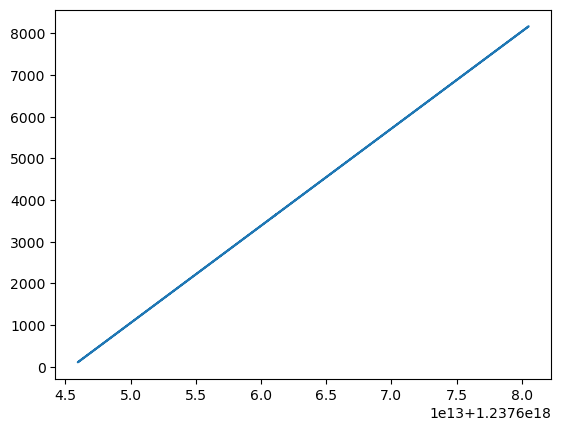

In [4]:
plt.plot(df['obj_ID'], df['run_ID'])

równie silna korelacja występuje dla kolumn spec_obj_ID oraz plate

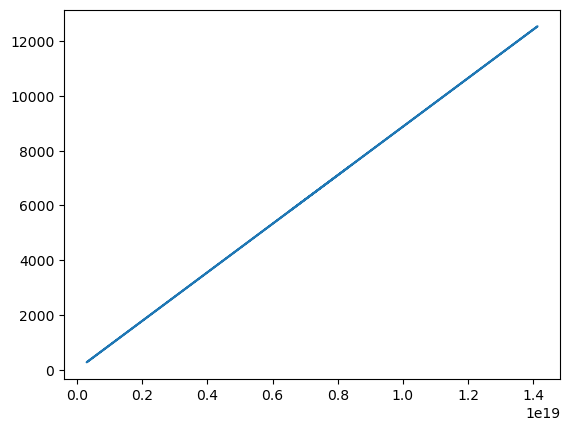

In [5]:
plt.plot(df['spec_obj_ID'], df['plate'])  ### jedna z tych zmiennych też do usunięcia

## alpha i delta

spójrzmy na zmienne alpha i delta. ostatni wykres w rzędzie to histogram dla wszystkich wierszy, bez podziału na klasy. Widzimy, że zmienna alpha przyjmuje bardzo mało wartości w przedziałach 60 - 100 oraz 250 - 300. Większość wartości w tych przedziałach jest typu star.

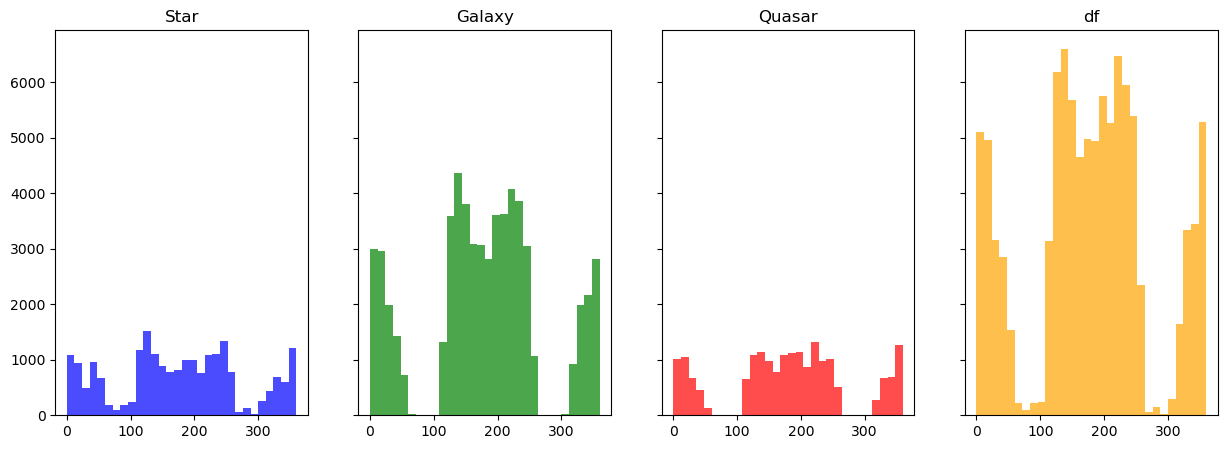

In [6]:
###alpha
class_star = df[df['class'] == 'STAR']
class_galaxy = df[df['class'] == 'GALAXY']
class_quasar = df[df['class'] == 'QSO']

fig, axs = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

axs[0].hist(class_star['alpha'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Star')

axs[1].hist(class_galaxy['alpha'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Galaxy')

axs[2].hist(class_quasar['alpha'], bins=30, color='red', alpha=0.7)
axs[2].set_title('Quasar')

axs[3].hist(df['alpha'], bins=30, color='orange', alpha=0.7)
axs[3].set_title('df')

plt.show()

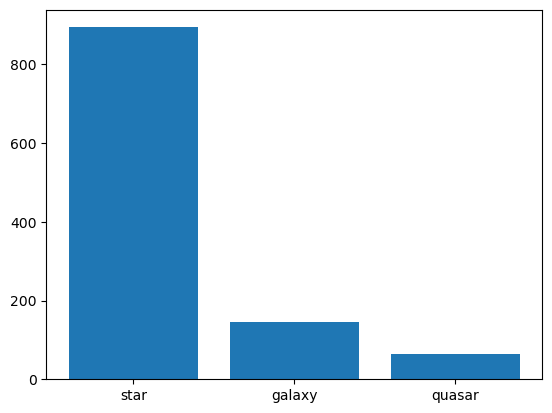

In [7]:
k = df[((df['alpha'] > 60) & (df['alpha'] < 100)) | ((df['alpha'] > 260) & (df['alpha'] < 300))]
star = k[k['class'] == 'STAR']
galaxy = k[k['class'] == 'GALAXY']
quasar = k[k['class'] == 'QSO']

rows = [len(star), len(galaxy), len(quasar)]
names = ['star', 'galaxy', 'quasar']

plt.bar(names, rows)
plt.show()

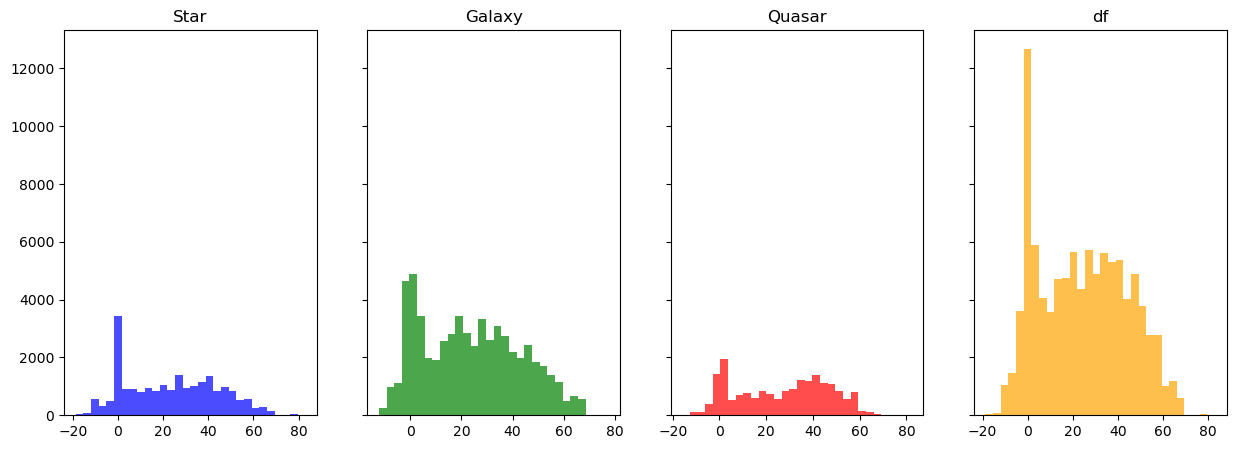

In [8]:
###delta
class_star = df[df['class'] == 'STAR']
class_galaxy = df[df['class'] == 'GALAXY']
class_quasar = df[df['class'] == 'QSO']

fig, axs = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

axs[0].hist(class_star['delta'], bins=30, color='blue', alpha=0.7)
axs[0].set_title('Star')

axs[1].hist(class_galaxy['delta'], bins=30, color='green', alpha=0.7)
axs[1].set_title('Galaxy')

axs[2].hist(class_quasar['delta'], bins=30, color='red', alpha=0.7)
axs[2].set_title('Quasar')

axs[3].hist(df['delta'], bins=30, color='orange', alpha=0.7)
axs[3].set_title('df')

plt.show()

zmienna delta przypomina rozkład normalny

<Axes: xlabel='alpha', ylabel='delta'>

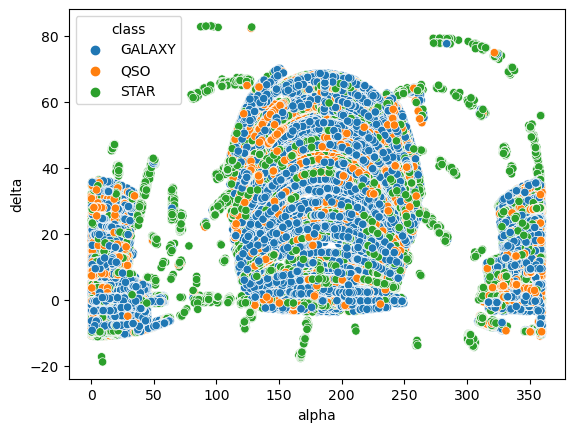

In [9]:
sns.scatterplot(x = df.alpha, y = df.delta, data = df, hue = 'class')
#zależnośc między alfa i delta

## filters

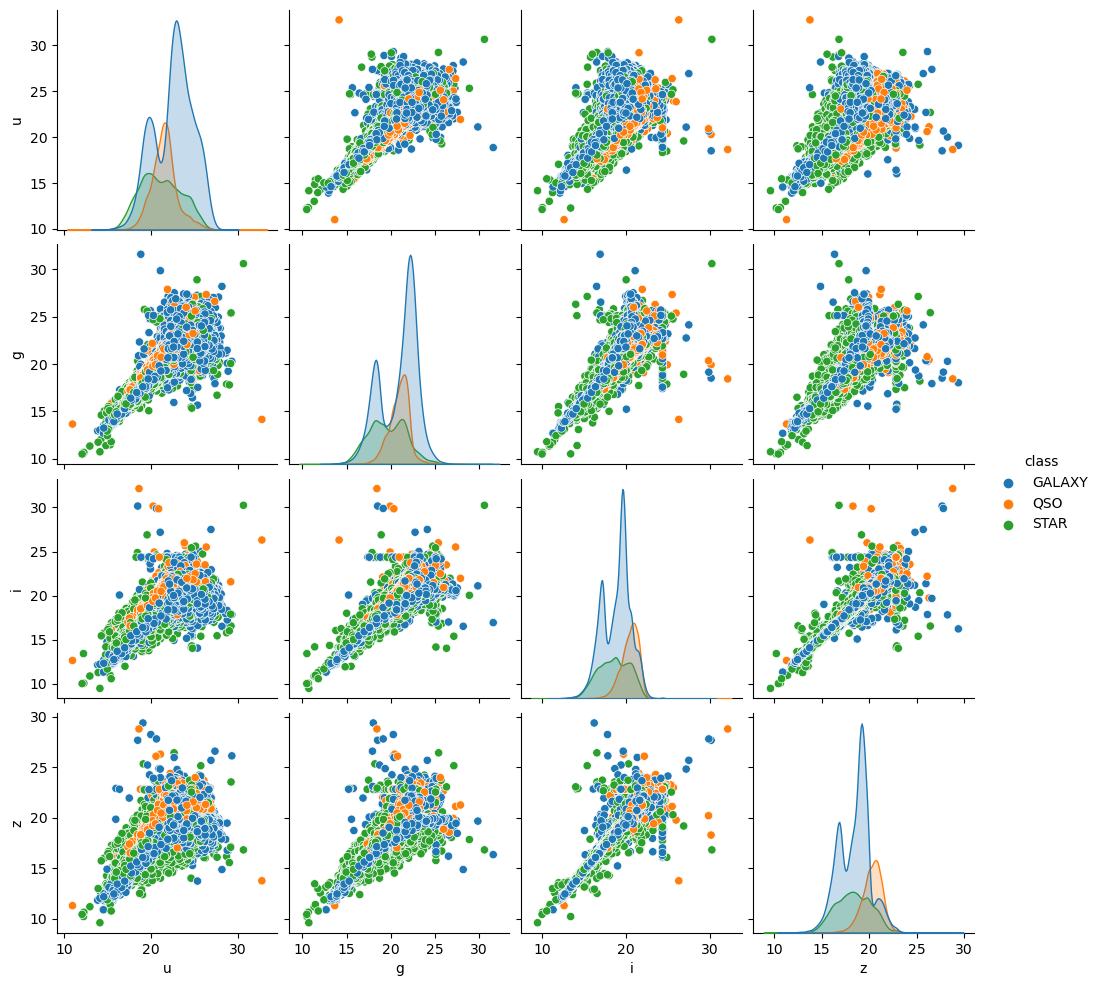

In [10]:
g = sns.pairplot(data=df[['u', 'g', 'i', 'z', 'class']],
                 hue='class')
plt.show()

Powyższe zmienne są również silnie skorelowane.